Import libraries

Taken from website:-
https://ourworldindata.org/coronavirus-source-data

In [1]:
import pandas as pd
import numpy as np

Read files

In [2]:
# load datasets
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92122,ZWE,Africa,Zimbabwe,2021-05-25,38706.0,10.0,15.857,1587.0,1.0,0.571,2604.198,0.673,1.067,106.776,0.067,0.038,1.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1416.0,540768.0,36.384,0.095,1937.0,0.130,0.008,122.2,tests performed,927990.0,639553.0,288437.0,13069.0,13719.0,6.24,4.30,1.94,923.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
92123,ZWE,Africa,Zimbabwe,2021-05-26,38819.0,113.0,29.571,1589.0,2.0,0.857,2611.800,7.603,1.990,106.910,0.135,0.058,1.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1629.0,542397.0,36.493,0.110,1725.0,0.116,0.017,58.3,tests performed,937040.0,643531.0,293509.0,9050.0,13194.0,6.30,4.33,1.97,888.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
92124,ZWE,Africa,Zimbabwe,2021-05-27,38854.0,35.0,31.286,1592.0,3.0,1.000,2614.155,2.355,2.105,107.112,0.202,0.067,1.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,953389.0,648121.0,305268.0,16349.0,12285.0,6.41,4.36,2.05,827.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
92125,ZWE,Africa,Zimbabw

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92127 entries, 0 to 92126
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               92127 non-null  object 
 1   continent                              87755 non-null  object 
 2   location                               92127 non-null  object 
 3   date                                   92127 non-null  object 
 4   total_cases                            89348 non-null  float64
 5   new_cases                              89347 non-null  float64
 6   new_cases_smoothed                     88335 non-null  float64
 7   total_deaths                           79449 non-null  float64
 8   new_deaths                             79607 non-null  float64
 9   new_deaths_smoothed                    88335 non-null  float64
 10  total_cases_per_million                88870 non-null  float64
 11  ne

Convert date to number

In [4]:
import datetime 

date = df.date

df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['date_num'] = df['date'].dt.strftime('%d%m%Y')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,24022020
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,25022020
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,26022020
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,27022020
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,28022020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92122,ZWE,Africa,Zimbabwe,2021-05-25,38706.0,10.0,15.857,1587.0,1.0,0.571,2604.198,0.673,1.067,106.776,0.067,0.038,1.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1416.0,540768.0,36.384,0.095,1937.0,0.130,0.008,122.2,tests performed,927990.0,639553.0,288437.0,13069.0,13719.0,6.24,4.30,1.94,923.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,25052021
92123,ZWE,Africa,Zimbabwe,2021-05-26,38819.0,113.0,29.571,1589.0,2.0,0.857,2611.800,7.603,1.990,106.910,0.135,0.058,1.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1629.0,542397.0,36.493,0.110,1725.0,0.116,0.017,58.3,tests performed,937040.0,643531.0,293509.0,9050.0,13194.0,6.30,4.33,1.97,888.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,26052021
92124,ZWE,Africa,Zimbabwe,2021-05-27,38854.0,35.0,31.286,1592.0,3.0,1.000,2614.155,2.355,2.105,107.112,0.202,0.067,1.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,953389.0,648121.0,305268.0,16349.0,12285.0,6.41,4.36,2.05,827.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.77

Percent new deaths to new cases

In [5]:
df['per_death_to_case'] = df.new_cases / df.new_deaths
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num,per_death_to_case
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,24022020,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,25022020,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,26022020,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,27022020,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,28022020,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92122,ZWE,Africa,Zimbabwe,2021-05-25,38706.0,10.0,15.857,1587.0,1.0,0.571,2604.198,0.673,1.067,106.776,0.067,0.038,1.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1416.0,540768.0,36.384,0.095,1937.0,0.130,0.008,122.2,tests performed,927990.0,639553.0,288437.0,13069.0,13719.0,6.24,4.30,1.94,923.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,25052021,10.000000
92123,ZWE,Africa,Zimbabwe,2021-05-26,38819.0,113.0,29.571,1589.0,2.0,0.857,2611.800,7.603,1.990,106.910,0.135,0.058,1.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1629.0,542397.0,36.493,0.110,1725.0,0.116,0.017,58.3,tests performed,937040.0,643531.0,293509.0,9050.0,13194.0,6.30,4.33,1.97,888.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,26052021,56.500000
92124,ZWE,Africa,Zimbabwe,2021-05-27,38854.0,35.0,31.286,1592.0,3.0,1.000,2614.155,2.355,2.105,107.112,0.202,0.067,1.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,953389.0,648121.0,305268.0,16349.0,12285.0,6.41,

Country

In [6]:
country = df['location'].to_list()

# using naive method to remove duplicated from list  
list_country = [] 
for i in country: 
    if i not in list_country: 
        list_country.append(i) 

list_country

['Afghanistan',
 'Africa',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Asia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bonaire Sint Eustatius and Saba',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czechia',
 'Democratic Republic of Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Europe',
 'European Union',


In [7]:
print(len(list_country))

230


Graphical Representation

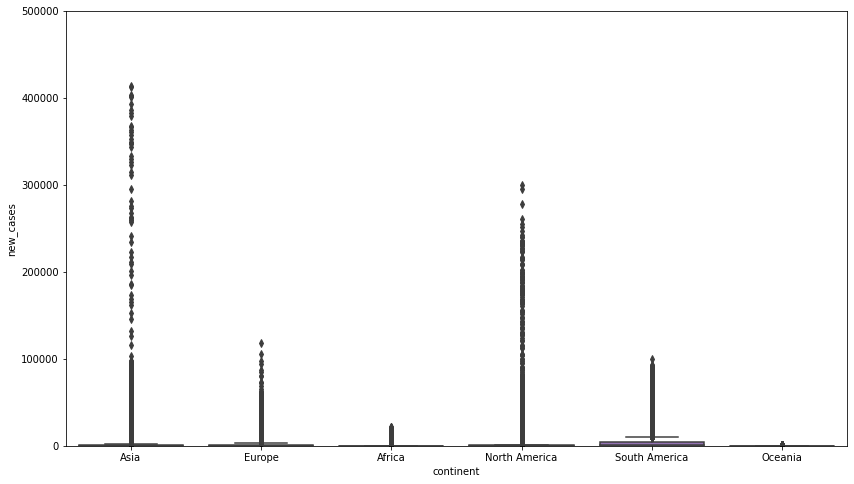

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

var = 'continent'
data = pd.concat([df['new_cases'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="new_cases", data=data)
fig.axis(ymin=0, ymax=500000);

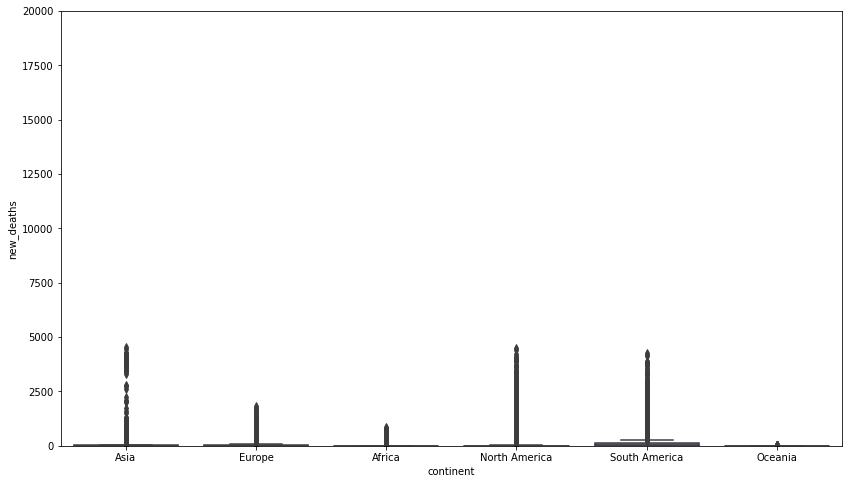

In [9]:
var = 'continent'
data = pd.concat([df['new_deaths'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="new_deaths", data=data)
fig.axis(ymin=0, ymax=20000);

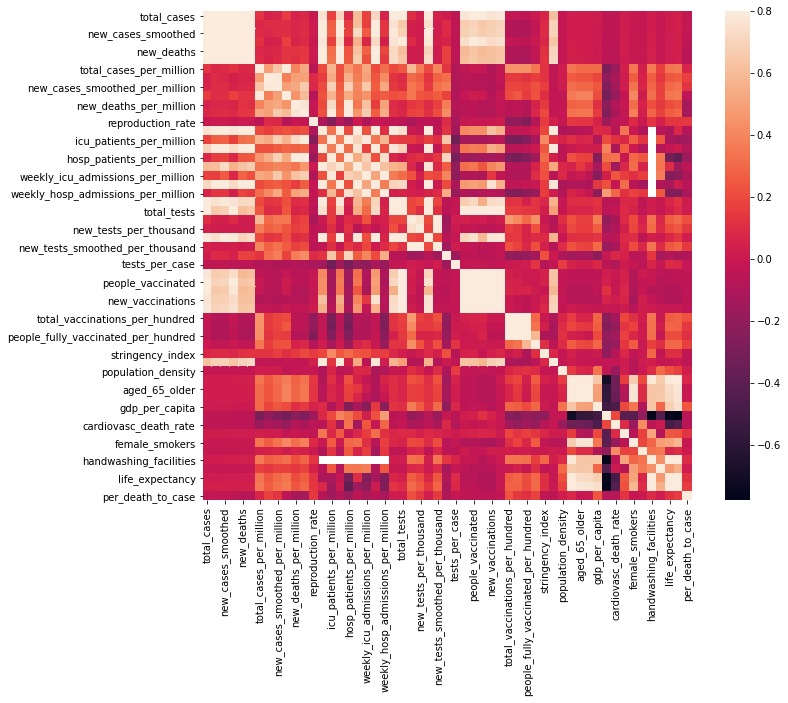

In [10]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

Countries

In [11]:
country = "Malaysia"

include_mal = df[df['location'].values == country]
exclude_mal = df[df['location'].values != country]
mal_cov19 = include_mal
mal_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num,per_death_to_case
50656,MYS,Asia,Malaysia,2020-01-25,3.0,3.0,NaN,NaN,NaN,NaN,0.093,0.093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,32365998.0,96.254,29.9,6.293,3.407,26808.164,0.1,260.942,16.74,1.0,42.4,NaN,1.9,76.16,0.81,25012020,NaN
50657,MYS,Asia,Malaysia,2020-01-26,4.0,1.0,NaN,NaN,NaN,NaN,0.124,0.031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,32365998.0,96.254,29.9,6.293,3.407,26808.164,0.1,260.942,16.74,1.0,42.4,NaN,1.9,76.16,0.81,26012020,NaN
50658,MYS,Asia,Malaysia,2020-01-27,4.0,0.0,NaN,NaN,NaN,NaN,0.124,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,32365998.0,96.254,29.9,6.293,3.407,26808.164,0.1,260.942,16.74,1.0,42.4,NaN,1.9,76.16,0.81,27012020,NaN
50659,MYS,Asia,Malaysia,2020-01-28,4.0,0.0,NaN,NaN,NaN,NaN,0.124,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,32365998.0,96.254,29.9,6.293,3.407,26808.164,0.1,260.942,16.74,1.0,42.4,NaN,1.9,76.16,0.81,28012020,NaN
50660,MYS,Asia,Malaysia,2020-01-29,7.0,3.0,NaN,NaN,NaN,NaN,0.216,0.093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,32365998.0,96.254,29.9,6.293,3.407,26808.164,0.1,260.942,16.74,1.0,42.4,NaN,1.9,76.16,0.81,29012020,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51142,MYS,Asia,Malaysia,2021-05-25,525889.0,7289.0,6638.286,2369.0,60.0,53.571,16248.194,225.205,205.101,73.194,1.854,1.655,1.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97121.0,11398905.0,352.188,3.001,105018.0,3.245,0.063,15.8,people tested,2730536.0,1731231.0,999305.0,99552.0,96843.0,8.44,5.35,3.09,2992.0,NaN,32365998.0,96.254,29.9,6.293,3.407,26808.164,0.1,260.942,16.74,1.0,42.4,NaN,1.9,76.16,0.81,25052021,121.483333
51143,MYS,Asia,Malaysia,2021-05-26,533367.0,7478.0,6838.714,2432.0,63.0,56.000,16479.238,231.045,211.293,75.141,1.946,1.730,1.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114446.0,11513351.0,355.724,3.536,106821.0,3.300,0.064,15.6,people tested,NaN,NaN,NaN,NaN,70231.0,NaN,NaN,NaN,2170.0,NaN,32365998.0,96.254,29.9,6.293,3.407,26808.164,0.1,260.942,16.74,1.0,42.4,NaN,1.9,76.16,0.81,26052021,118.698413
51144,MYS,Asia,Malaysia,2021-05-27,541224.0,7857.0,6988.857,2491.0,59.0,56.000,16721.993,242.755,215.932,76.963,1.823,1.730,1.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2859864.0,1809412.0,1050452.0,

In [12]:
country = "India"

include_i = df[df['location'].values == country]
exclude_i = df[df['location'].values != country]
i_cov19 = include_i
i_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num,per_death_to_case
38092,IND,Asia,India,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,30012020,NaN
38093,IND,Asia,India,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,31012020,NaN
38094,IND,Asia,India,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,01022020,NaN
38095,IND,Asia,India,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,02022020,NaN
38096,IND,Asia,India,2020-02-03,3.0,1.0,NaN,NaN,NaN,NaN,0.002,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,03022020,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38573,IND,Asia,India,2021-05-25,27157795.0,208921.0,237352.143,311388.0,4157.0,4020.000,19679.499,151.392,171.994,225.643,3.012,2.913,0.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2058112.0,332594176.0,241.010,1.491,2043042.0,1.480,0.116,8.6,samples tested,195506779.0,153511379.0,41995400.0,1341068.0,1473597.0,14.17,11.12,3.04,1068.0,81.94,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,25052021,50.257638
38574,IND,Asia,India,2021-05-26,27369093.0,211298.0,228093.286,315235.0,3847.0,4016.143,19832.613,153.114,165.284,228.430,2.788,2.910,0.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2217320.0,334811496.0,242.616,1.607,2072903.0,1.502,0.110,9.1,samples tested,198425615.0,156189641.0,42235974.0,2918836.0,1716431.0,14.38,11.32,3.06,1244.0,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,26052021,54.925396
38575,IND,Asia,India,2021-05-27,27555457.0,186364.0,217638.000,318895.0,3660.0,3937.714,19967.659,135.046,157.708,231.083,2.6

Malaysia

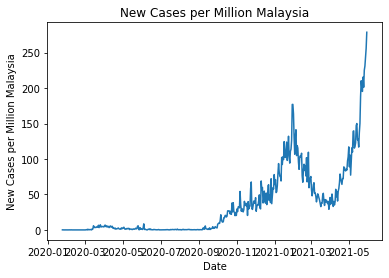

In [13]:
plt.plot(mal_cov19.date, mal_cov19.new_cases_per_million)
plt.xlabel('Date')
plt.ylabel('New Cases per Million Malaysia')
plt.title('New Cases per Million Malaysia')
plt.show()

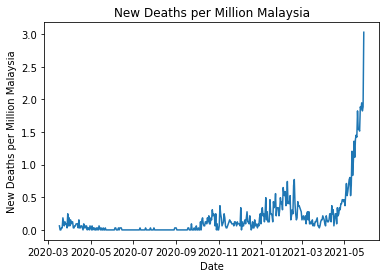

In [14]:
plt.plot(mal_cov19.date, mal_cov19.new_deaths_per_million)
plt.xlabel('Date')
plt.ylabel('New Deaths per Million Malaysia')
plt.title('New Deaths per Million Malaysia')
plt.show()

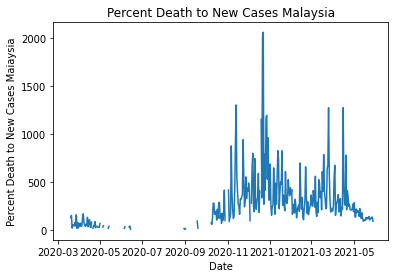

In [15]:
plt.plot(mal_cov19.date, mal_cov19.per_death_to_case)
plt.xlabel('Date')
plt.ylabel('Percent Death to New Cases Maiaysia')
plt.title('Percent Death to New Cases Malaysia')
plt.show()

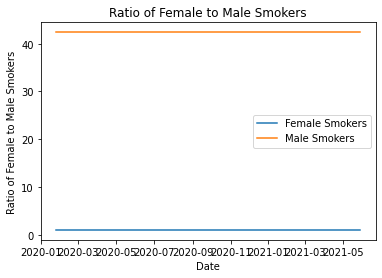

In [16]:
plt.plot(mal_cov19.date, mal_cov19.female_smokers)
plt.plot(mal_cov19.date, mal_cov19.male_smokers)
plt.legend(['Female Smokers', 'Male Smokers'])
plt.xlabel('Date')
plt.ylabel('Ratio of Female to Male Smokers')
plt.title('Ratio of Female to Male Smokers')
plt.show()

India

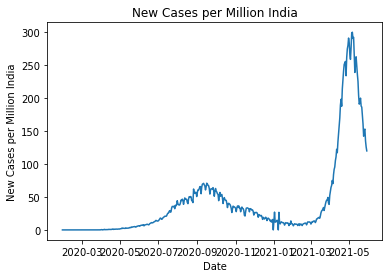

In [17]:
plt.plot(i_cov19.date, i_cov19.new_cases_per_million)
plt.xlabel('Date')
plt.ylabel('New Cases per Million India')
plt.title('New Cases per Million India')
plt.show()

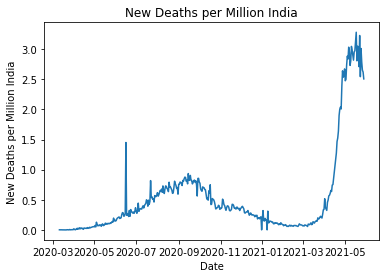

In [18]:
plt.plot(i_cov19.date, i_cov19.new_deaths_per_million)
plt.xlabel('Date')
plt.ylabel('New Deaths per Million India')
plt.title('New Deaths per Million India')
plt.show()

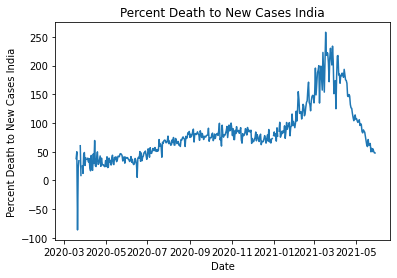

In [19]:
plt.plot(i_cov19.date, i_cov19.per_death_to_case)
plt.xlabel('Date')
plt.ylabel('Percent Death to New Cases India')
plt.title('Percent Death to New Cases India')
plt.show()

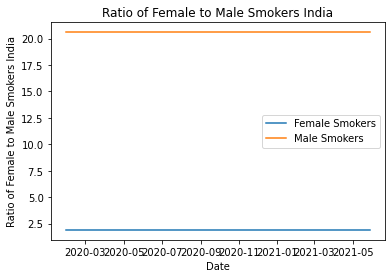

In [20]:
plt.plot(i_cov19.date, i_cov19.female_smokers)
plt.plot(i_cov19.date, i_cov19.male_smokers)
plt.legend(['Female Smokers', 'Male Smokers'])
plt.xlabel('Date')
plt.ylabel('Ratio of Female to Male Smokers India')
plt.title('Ratio of Female to Male Smokers India')
plt.show()

Comparisons

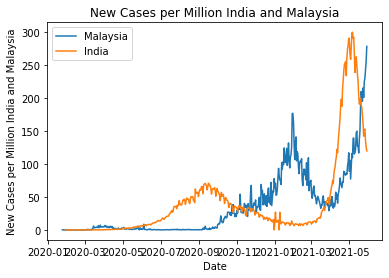

In [21]:
plt.plot(mal_cov19.date, mal_cov19.new_cases_per_million)
plt.plot(i_cov19.date, i_cov19.new_cases_per_million)
plt.legend(['Malaysia', 'India'])
plt.xlabel('Date')
plt.ylabel('New Cases per Million India and Malaysia')
plt.title('New Cases per Million India and Malaysia')
plt.show()

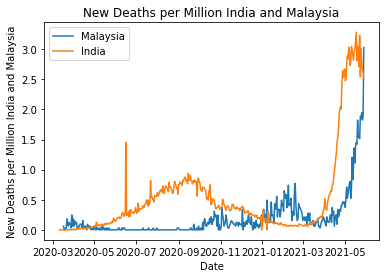

In [22]:
plt.plot(mal_cov19.date, mal_cov19.new_deaths_per_million)
plt.plot(i_cov19.date, i_cov19.new_deaths_per_million)
plt.legend(['Malaysia', 'India'])
plt.xlabel('Date')
plt.ylabel('New Deaths per Million India and Malaysia')
plt.title('New Deaths per Million India and Malaysia')
plt.show()

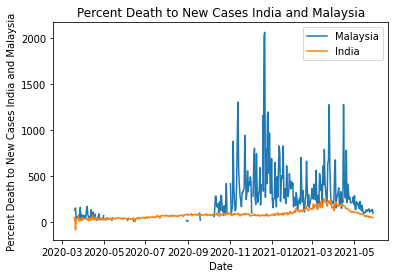

In [23]:
plt.plot(mal_cov19.date, mal_cov19.per_death_to_case)
plt.plot(i_cov19.date, i_cov19.per_death_to_case)
plt.legend(['Malaysia', 'India'])
plt.xlabel('Date')
plt.ylabel('Percent Death to New Cases India and Malaysia')
plt.title('Percent Death to New Cases India and Malaysia')
plt.show()

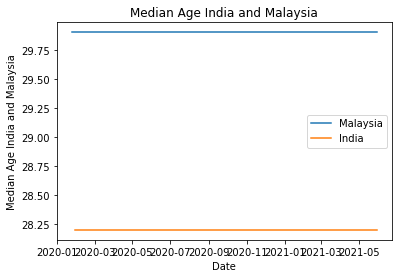

In [24]:
plt.plot(mal_cov19.date, mal_cov19.median_age)
plt.plot(i_cov19.date, i_cov19.median_age)
plt.legend(['Malaysia', 'India'])
plt.xlabel('Date')
plt.ylabel('Median Age India and Malaysia')
plt.title('Median Age India and Malaysia')
plt.show()

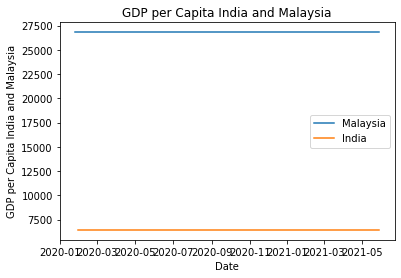

In [25]:
plt.plot(mal_cov19.date, mal_cov19.gdp_per_capita)
plt.plot(i_cov19.date, i_cov19.gdp_per_capita)
plt.legend(['Malaysia', 'India'])
plt.xlabel('Date')
plt.ylabel('GDP per Capita India and Malaysia')
plt.title('GDP per Capita India and Malaysia')
plt.show()

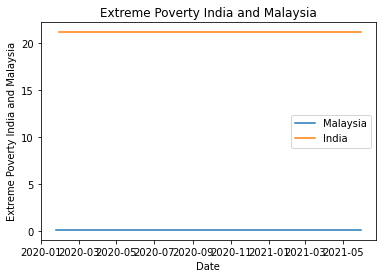

In [26]:
plt.plot(mal_cov19.date, mal_cov19.extreme_poverty)
plt.plot(i_cov19.date, i_cov19.extreme_poverty)
plt.legend(['Malaysia', 'India'])
plt.xlabel('Date')
plt.ylabel('Extreme Poverty India and Malaysia')
plt.title('Extreme Poverty India and Malaysia')
plt.show()

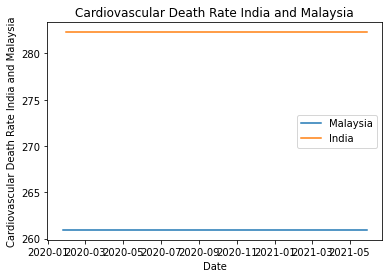

In [27]:
plt.plot(mal_cov19.date, mal_cov19.cardiovasc_death_rate)
plt.plot(i_cov19.date, i_cov19.cardiovasc_death_rate)
plt.legend(['Malaysia', 'India'])
plt.xlabel('Date')
plt.ylabel('Cardiovascular Death Rate India and Malaysia')
plt.title('Cardiovascular Death Rate India and Malaysia')
plt.show()

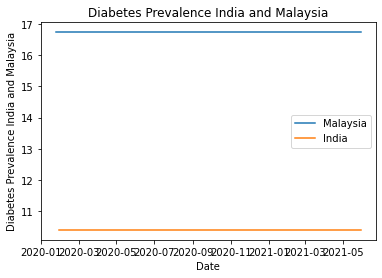

In [28]:
plt.plot(mal_cov19.date, mal_cov19.diabetes_prevalence)
plt.plot(i_cov19.date, i_cov19.diabetes_prevalence)
plt.legend(['Malaysia', 'India'])
plt.xlabel('Date')
plt.ylabel('Diabetes Prevalence India and Malaysia')
plt.title('Diabetes Prevalence India and Malaysia')
plt.show()

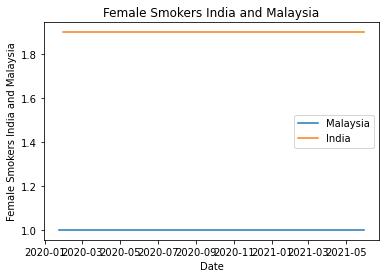

In [29]:
plt.plot(mal_cov19.date, mal_cov19.female_smokers)
plt.plot(i_cov19.date, i_cov19.female_smokers)
plt.legend(['Malaysia', 'India'])
plt.xlabel('Date')
plt.ylabel('Female Smokers India and Malaysia')
plt.title('Female Smokers India and Malaysia')
plt.show()

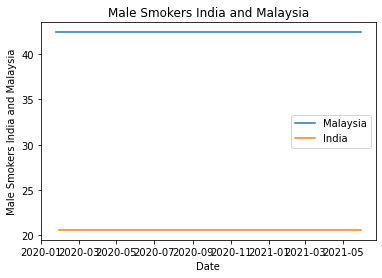

In [30]:
plt.plot(mal_cov19.date, mal_cov19.male_smokers)
plt.plot(i_cov19.date, i_cov19.male_smokers)
plt.legend(['Malaysia', 'India'])
plt.xlabel('Date')
plt.ylabel('Male Smokers India and Malaysia')
plt.title('Male Smokers India and Malaysia')
plt.show()

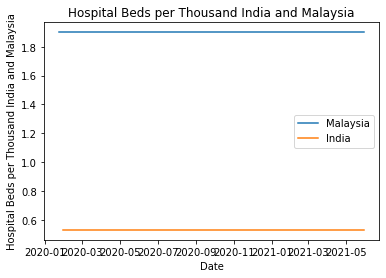

In [31]:
plt.plot(mal_cov19.date, mal_cov19.hospital_beds_per_thousand)
plt.plot(i_cov19.date, i_cov19.hospital_beds_per_thousand)
plt.legend(['Malaysia', 'India'])
plt.xlabel('Date')
plt.ylabel('Hospital Beds per Thousand India and Malaysia')
plt.title('Hospital Beds per Thousand India and Malaysia')
plt.show()

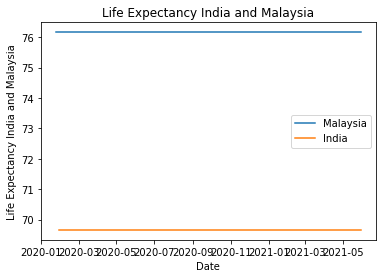

In [32]:
plt.plot(mal_cov19.date, mal_cov19.life_expectancy)
plt.plot(i_cov19.date, i_cov19.life_expectancy)
plt.legend(['Malaysia', 'India'])
plt.xlabel('Date')
plt.ylabel('Life Expectancy India and Malaysia')
plt.title('Life Expectancy India and Malaysia')
plt.show()

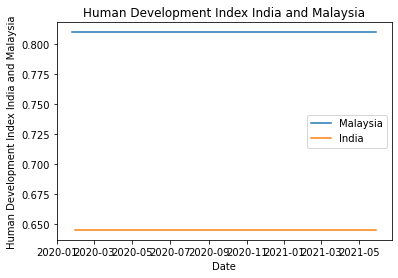

In [33]:
plt.plot(mal_cov19.date, mal_cov19.human_development_index)
plt.plot(i_cov19.date, i_cov19.human_development_index)
plt.legend(['Malaysia', 'India'])
plt.xlabel('Date')
plt.ylabel('Human Development Index India and Malaysia')
plt.title('Human Development Index India and Malaysia')
plt.show()